<hr style="height:2px;">

# Apply trained CARE model for for denoising of *X-ray Holographic Nanotomography* data

Adapted from demo notebook. 

This notebook demonstrates applying a CARE model for a 3D denoising task, assuming that training was already completed via [2_training.ipynb](2_training.ipynb).  
The trained model is assumed to be located in the folder `models` with the name `my_model`.

More documentation is available at http://csbdeep.bioimagecomputing.com/doc/.

In [1]:
from __future__ import print_function, unicode_literals, absolute_import, division
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from tifffile import imread
from csbdeep.utils import Path, download_and_extract_zip_file, plot_some
from csbdeep.io import save_tiff_imagej_compatible
from csbdeep.models import CARE

2021-07-21 09:41:42.239929: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [2]:
# SET DATA PATH
datapath = "/n/groups/htem/ESRF_id16a/tomo_ML/ReducedAnglesXray/CARE/mCTX/"

<hr style="height:2px;">

# Raw low-SNR image and associated high-SNR ground truth

Plot the test stack pair and define its image axes, which will be needed later for CARE prediction.

image size = (256, 512, 512)
image axes = ZYX


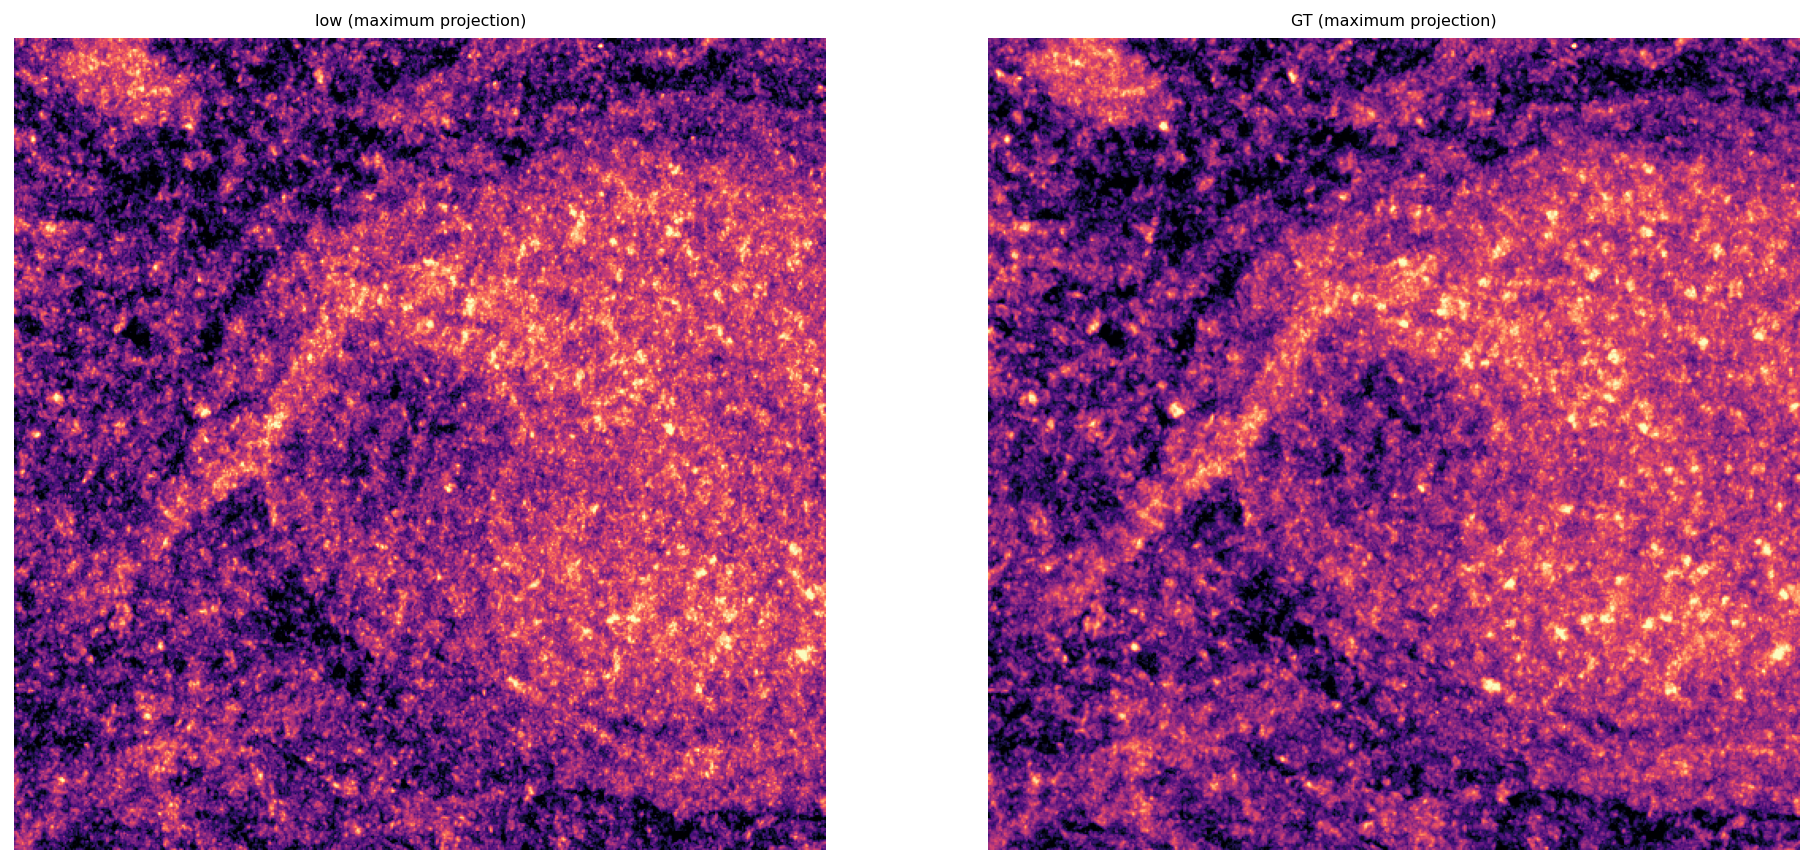

In [3]:
y = imread(datapath + 'test/GT/mCTX_17keV_30nm_512c_first256.tif')
x = imread(datapath + 'test/low/mCTX_17keV_30nm_512c_first256.tif')

axes = 'ZYX'
print('image size =', x.shape)
print('image axes =', axes)

plt.figure(figsize=(16,10))
plot_some(np.stack([x,y]),
          title_list=[['low (maximum projection)','GT (maximum projection)']], 
          pmin=2,pmax=99.8);

<hr style="height:2px;">

# CARE model

Load trained model (located in base directory `models` with name `my_model`) from disk.  
The configuration was saved during training and is automatically loaded when `CARE` is initialized with `config=None`.

In [8]:
model = CARE(config=None, name='my_model_900p_100', basedir='models')

Loading network weights from 'weights_best.h5'.


## Apply CARE network to raw image

Predict the restored image (image will be successively split into smaller tiles if there are memory issues).

In [11]:
%%time
restored = model.predict(x, axes)

2021-07-21 09:48:49.878979: W tensorflow/core/common_runtime/bfc_allocator.cc:433] Allocator (GPU_0_bfc) ran out of memory trying to allocate 8.00GiB (rounded to 8589934592)requested by op model_1/down_level_0_no_0/Conv3D
Current allocation summary follows.
2021-07-21 09:48:49.879080: I tensorflow/core/common_runtime/bfc_allocator.cc:972] BFCAllocator dump for GPU_0_bfc
2021-07-21 09:48:49.879131: I tensorflow/core/common_runtime/bfc_allocator.cc:979] Bin (256): 	Total Chunks: 50, Chunks in use: 50. 12.5KiB allocated for chunks. 12.5KiB in use in bin. 3.6KiB client-requested in use in bin.
2021-07-21 09:48:49.879157: I tensorflow/core/common_runtime/bfc_allocator.cc:979] Bin (512): 	Total Chunks: 3, Chunks in use: 2. 1.5KiB allocated for chunks. 1.0KiB in use in bin. 1.0KiB client-requested in use in bin.
2021-07-21 09:48:49.879180: I tensorflow/core/common_runtime/bfc_allocator.cc:979] Bin (1024): 	Total Chunks: 1, Chunks in use: 1. 1.2KiB allocated for chunks. 1.2KiB in use in bin. 1

Out of memory, retrying with n_tiles = (1, 1, 2)


2021-07-21 09:49:00.780650: W tensorflow/core/common_runtime/bfc_allocator.cc:433] Allocator (GPU_0_bfc) ran out of memory trying to allocate 4.69GiB (rounded to 5033164800)requested by op model_1/down_level_0_no_0/Conv3D
Current allocation summary follows.
2021-07-21 09:49:00.780728: I tensorflow/core/common_runtime/bfc_allocator.cc:972] BFCAllocator dump for GPU_0_bfc
2021-07-21 09:49:00.780769: I tensorflow/core/common_runtime/bfc_allocator.cc:979] Bin (256): 	Total Chunks: 52, Chunks in use: 51. 13.0KiB allocated for chunks. 12.8KiB in use in bin. 3.6KiB client-requested in use in bin.
2021-07-21 09:49:00.780795: I tensorflow/core/common_runtime/bfc_allocator.cc:979] Bin (512): 	Total Chunks: 2, Chunks in use: 2. 1.0KiB allocated for chunks. 1.0KiB in use in bin. 1.0KiB client-requested in use in bin.
2021-07-21 09:49:00.780818: I tensorflow/core/common_runtime/bfc_allocator.cc:979] Bin (1024): 	Total Chunks: 1, Chunks in use: 1. 1.2KiB allocated for chunks. 1.2KiB in use in bin. 1

Out of memory, retrying with n_tiles = (1, 2, 2)


2021-07-21 09:49:01.300427: W tensorflow/core/common_runtime/bfc_allocator.cc:248] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.76GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.
2021-07-21 09:49:13.369884: W tensorflow/core/common_runtime/bfc_allocator.cc:433] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.75GiB (rounded to 2949120000)requested by op model_1/down_level_0_no_1/Conv3D
Current allocation summary follows.
2021-07-21 09:49:13.369979: I tensorflow/core/common_runtime/bfc_allocator.cc:972] BFCAllocator dump for GPU_0_bfc
2021-07-21 09:49:13.370042: I tensorflow/core/common_runtime/bfc_allocator.cc:979] Bin (256): 	Total Chunks: 52, Chunks in use: 51. 13.0KiB allocated for chunks. 12.8KiB in use in bin. 3.6KiB client-requested in use in bin.
2021-07-21 09:49:13.370064: I tensorflow/core/common_runtime/bfc_allocator.cc:979] Bin (512): 	Tota

Out of memory, retrying with n_tiles = (1, 2, 4)


2021-07-21 09:49:25.664127: W tensorflow/core/common_runtime/bfc_allocator.cc:433] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.79GiB (rounded to 1926758400)requested by op model_1/down_level_0_no_1/Conv3D
Current allocation summary follows.
2021-07-21 09:49:25.664229: I tensorflow/core/common_runtime/bfc_allocator.cc:972] BFCAllocator dump for GPU_0_bfc
2021-07-21 09:49:25.664304: I tensorflow/core/common_runtime/bfc_allocator.cc:979] Bin (256): 	Total Chunks: 52, Chunks in use: 51. 13.0KiB allocated for chunks. 12.8KiB in use in bin. 3.6KiB client-requested in use in bin.
2021-07-21 09:49:25.664352: I tensorflow/core/common_runtime/bfc_allocator.cc:979] Bin (512): 	Total Chunks: 2, Chunks in use: 2. 1.0KiB allocated for chunks. 1.0KiB in use in bin. 1.0KiB client-requested in use in bin.
2021-07-21 09:49:25.664396: I tensorflow/core/common_runtime/bfc_allocator.cc:979] Bin (1024): 	Total Chunks: 1, Chunks in use: 1. 1.2KiB allocated for chunks. 1.2KiB in use in bin. 1

Out of memory, retrying with n_tiles = (1, 4, 4)


2021-07-21 09:49:51.763176: W tensorflow/core/common_runtime/bfc_allocator.cc:433] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.17GiB (rounded to 1258815488)requested by op model_1/up_level_0_no_0/Conv3D
Current allocation summary follows.
2021-07-21 09:49:51.763291: I tensorflow/core/common_runtime/bfc_allocator.cc:972] BFCAllocator dump for GPU_0_bfc
2021-07-21 09:49:51.763345: I tensorflow/core/common_runtime/bfc_allocator.cc:979] Bin (256): 	Total Chunks: 52, Chunks in use: 51. 13.0KiB allocated for chunks. 12.8KiB in use in bin. 3.6KiB client-requested in use in bin.
2021-07-21 09:49:51.763371: I tensorflow/core/common_runtime/bfc_allocator.cc:979] Bin (512): 	Total Chunks: 2, Chunks in use: 2. 1.0KiB allocated for chunks. 1.0KiB in use in bin. 1.0KiB client-requested in use in bin.
2021-07-21 09:49:51.763394: I tensorflow/core/common_runtime/bfc_allocator.cc:979] Bin (1024): 	Total Chunks: 1, Chunks in use: 1. 1.2KiB allocated for chunks. 1.2KiB in use in bin. 1.0

Out of memory, retrying with n_tiles = (2, 4, 4)


100%|██████████| 32/32 [01:01<00:00,  1.91s/it]


CPU times: user 1min 3s, sys: 41.8 s, total: 1min 45s
Wall time: 2min 36s


Alternatively, one can directly set `n_tiles` to avoid the time overhead from multiple retries in case of memory issues.

**Note**: *Out of memory* problems during `model.predict` can also indicate that the GPU is used by another process. In particular, shut down the training notebook before running the prediction (you may need to restart this notebook).

In [ ]:
%%time
restored = model.predict(x, axes, n_tiles=(1,4,4))

## Save restored image

Save the restored image stack as a ImageJ-compatible TIFF image, i.e. the image can be opened in ImageJ/Fiji with correct axes semantics.

In [12]:
Path('results').mkdir(exist_ok=True)
save_tiff_imagej_compatible(datapath+'results/%s_mCTX_17keV_30nm_512c.tif' % model.name, restored, axes)

<hr style="height:2px;">

# Raw low/high-SNR image and denoised image via CARE network

Plot the test stack pair and the predicted restored stack (middle).

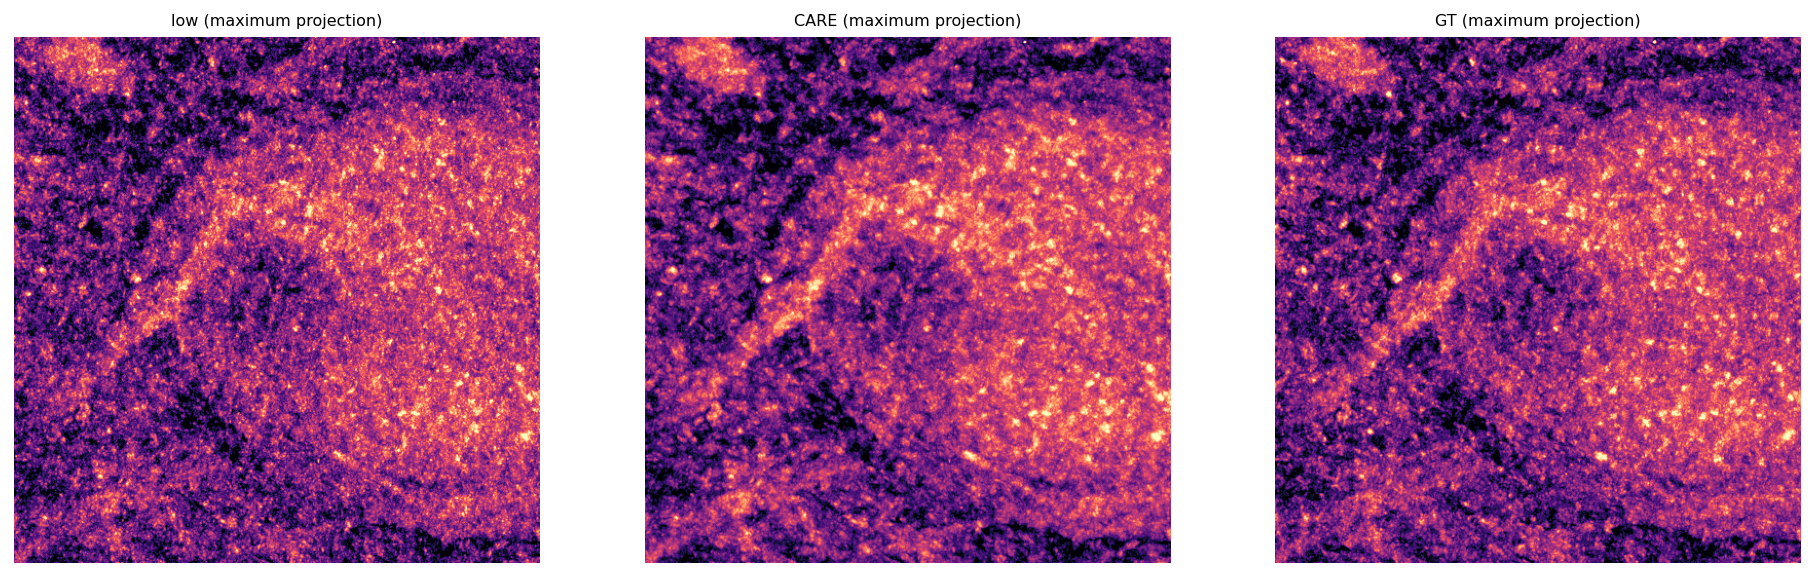

In [13]:
plt.figure(figsize=(16,10))
plot_some(np.stack([x,restored,y]),
          title_list=[['low (maximum projection)','CARE (maximum projection)','GT (maximum projection)']], 
          pmin=2,pmax=99.8);